## Imports 
Note: python3. Please install requirements using requirments.txt in main directory. 

In [1]:
import sys
import glob
import fnmatch
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import nanogbcdt
from nanogbcdt.DataUtil import DataUtil
from nanogbcdt.NatVsTech import NatVsTech

## Directory structure
Note: we generically define directory so it will work on any OS: mac/pc/linux.
Note: drop the "" around "__file__" when in a regular python file. 

In [2]:
PARENT_PATH = os.path.abspath(os.path.join(os.path.dirname("__file__"), os.path.pardir))
DATABASES_BASEPATH = os.path.abspath(os.path.join(os.path.dirname("__file__"), 'databases'))
IMPORT_TRAINING_DATABASE_PATH = os.path.abspath(
	os.path.join(DATABASES_BASEPATH, 'training_data'))
IMPORT_TESTING_DATABASE_PATH = os.path.abspath(
	os.path.join(DATABASES_BASEPATH, 'test_data'))
OUTPUT_DATA_SUMMARY_PATH = os.path.abspath(
	os.path.join(os.path.dirname("__file__"), 'output'))

# print the paths, just to make sure things make sense
print(PARENT_PATH)
print(DATABASES_BASEPATH)
print(IMPORT_TRAINING_DATABASE_PATH)
print(OUTPUT_DATA_SUMMARY_PATH)

/Users/tron/sami_tests/Praetorius_Goldberg_2016/src
/Users/tron/sami_tests/Praetorius_Goldberg_2016/src/examples/databases
/Users/tron/sami_tests/Praetorius_Goldberg_2016/src/examples/databases/training_data
/Users/tron/sami_tests/Praetorius_Goldberg_2016/src/examples/output


## Training files
Import training files, combine, and concatenate into dataframes. 
Note: if you re-run the notebook without resetting the kernal, you'll get an error. Restart the notebook kernal and it will work. 

In [3]:
# set the natural and technical database training file names
NATURAL_TRAINING_DATABASE_NAME_ = 'natural_training_data.csv'
TECHNICAL_TRAINING_DATABASE_NAME_ = 'technical_training_data.csv'

# change the directory to the import training data path
os.chdir(IMPORT_TRAINING_DATABASE_PATH)

# find all csv's in the directory
training_files = glob.glob('*.csv')

# iterate through files and assign classification id
for file in training_files:
	if fnmatch.fnmatchcase(file, TECHNICAL_TRAINING_DATABASE_NAME_):
		technical_training_database = pd.DataFrame.from_csv(
			os.path.join(file), header=0, index_col=None)

		# assign classification id
		technical_training_database['classification'] = 0

	elif fnmatch.fnmatchcase(file, NATURAL_TRAINING_DATABASE_NAME_):
		natural_training_database = pd.DataFrame.from_csv(
			os.path.join(file), header=0, index_col=None)

		# assign classification id
		natural_training_database['classification'] = 1

print(training_files)
# concatenate all the data into a single file
training_data = pd.concat([natural_training_database,
						   technical_training_database])

# remove all the na values (other filtering done later)
training_data = DataUtil.filter_na(training_data)

['natural_training_data.csv', 'technical_training_data.csv']


## Using the API
Before you can use the API, you have to initialize the class. We'll then work through how the data is easily filtered, stored, and used for training and prediction. 

In [4]:
# initialize class
nat_v_tech = NatVsTech()

print (nat_v_tech)
        

In [5]:
neg_filt_training_data = DataUtil.filter_negative(data=training_data)

# threshold the data with a single isotope trigger
thresh_neg_filt_training_data = DataUtil.apply_detection_threshold(data=neg_filt_training_data, threshold_value=5)

# print to maake sure we're on target
print(thresh_neg_filt_training_data.head())

     25Mg    55Mn    59Co    60Ni   65Cu    66Zn    88Sr    90Zr    93Nb  \
0  2.6333  0.0000  0.0000  0.7809  0.000  1.6047  6.2237  0.0000  0.0000   
1  1.5857  1.3047  0.0000  0.7762  0.000  0.0000  1.2381  0.0000  1.1667   
2  0.0000  0.0000  0.0000  0.6381  1.719  0.0000  0.0000  1.4714  0.0000   
3  5.3095  1.2286  0.8476  0.0000  0.000  0.0000  2.6285  0.0000  0.0000   
4  0.0000  1.2428  0.0000  0.0000  0.000  0.6095  2.2666  0.0000  0.0000   

     95Mo       ...         149Sm   153Eu   157Gd  159Tb    182W   206Pb  \
0  0.0000       ...        0.0000  0.0000  0.0000    0.0  0.7095  1.0524   
1  1.3143       ...        0.0000  0.1667  0.0000    0.0  0.9571  0.5333   
2  1.7619       ...        0.0000  0.0000  0.3476    0.0  0.1095  0.4333   
3  0.0000       ...        1.3952  0.0000  0.0000    0.0  0.4524  1.3809   
4  0.0000       ...        0.0000  1.0000  0.0000    0.0  0.0000  1.0714   

    208Pb   232Th    238U  classification  
0  2.3904  1.0809  0.0000               1 

In [6]:
# right now training data contains the classification data. Split it.
(training_df, target_df) = DataUtil.split_target_from_training_data(df=thresh_neg_filt_training_data)

# print training data to check structure
print(training_df.head())

# print target data to check structure
print(target_df.head())

     25Mg    55Mn    59Co    60Ni   65Cu    66Zn    88Sr    90Zr    93Nb  \
0  2.6333  0.0000  0.0000  0.7809  0.000  1.6047  6.2237  0.0000  0.0000   
1  1.5857  1.3047  0.0000  0.7762  0.000  0.0000  1.2381  0.0000  1.1667   
2  0.0000  0.0000  0.0000  0.6381  1.719  0.0000  0.0000  1.4714  0.0000   
3  5.3095  1.2286  0.8476  0.0000  0.000  0.0000  2.6285  0.0000  0.0000   
4  0.0000  1.2428  0.0000  0.0000  0.000  0.6095  2.2666  0.0000  0.0000   

     95Mo   ...     147Sm   149Sm   153Eu   157Gd  159Tb    182W   206Pb  \
0  0.0000   ...    0.0000  0.0000  0.0000  0.0000    0.0  0.7095  1.0524   
1  1.3143   ...    1.0667  0.0000  0.1667  0.0000    0.0  0.9571  0.5333   
2  1.7619   ...    0.0000  0.0000  0.0000  0.3476    0.0  0.1095  0.4333   
3  0.0000   ...    0.0000  1.3952  0.0000  0.0000    0.0  0.4524  1.3809   
4  0.0000   ...    0.0000  0.0000  1.0000  0.0000    0.0  0.0000  1.0714   

    208Pb   232Th    238U  
0  2.3904  1.0809  0.0000  
1  1.9476  0.0000  0.0095  
2 

In [7]:
# initialize gbc parameters to determine max estimators with least overfitting
GBC_INIT_PARAMS = {'loss': 'deviance', 'learning_rate': 0.1,
				   'min_samples_leaf': 100, 'n_estimators': 1000,
				   'max_depth': 5, 'random_state': None, 'max_features': 'sqrt'}

# print to verify parameter init structure
print(GBC_INIT_PARAMS)

# outline grid search parameters
# set optimum boosting stages. Note: n_estimators automatically set
GBC_GRID_SEARCH_PARAMS = {'loss': ['exponential', 'deviance'],
						  'learning_rate': [0.01, 0.1],
						  'min_samples_leaf': [50, 100],
						  'random_state': [None],
						  'max_features': ['sqrt', 'log2'],
						  'max_depth': [5],
						  'n_estimators': [50]}

print(GBC_GRID_SEARCH_PARAMS)


{'max_depth': 5, 'min_samples_leaf': 100, 'n_estimators': 1000, 'random_state': None, 'learning_rate': 0.1, 'max_features': 'sqrt', 'loss': 'deviance'}
{'max_depth': [5], 'max_features': ['sqrt', 'log2'], 'n_estimators': [50], 'random_state': [None], 'min_samples_leaf': [50, 100], 'learning_rate': [0.01, 0.1], 'loss': ['exponential', 'deviance']}


In [8]:
# determining optimum feature selection with rfecv
result = nat_v_tech.rfecv_feature_identify(training_df=training_df, target_df=target_df,
								  gbc_grid_params=GBC_GRID_SEARCH_PARAMS,
								  gbc_init_params=GBC_INIT_PARAMS,
								  n_splits=2)

print(result.name_list_)
print(result.grid_scores_)
print(result.holdout_predictions_)
print(result.class_scores_f1_)
print(result.class_scores_r2_)
print(result.class_scores_mae_)
print(result.feature_importances_)

Runs:  1  of  2
Runs:  2  of  2
        0
0    25Mg
1    55Mn
2    59Co
3    60Ni
4    65Cu
5    66Zn
6    88Sr
7    90Zr
8    93Nb
9    95Mo
10  107Ag
11  139La
12  140Ce
13  141Pr
14  143Nd
15  146Nd
16  147Sm
17  153Eu
18  157Gd
19  159Tb
20   182W
21  206Pb
22  208Pb
23  232Th
24   238U
0    25Mg
1    55Mn
2    59Co
3    60Ni
4    65Cu
5    66Zn
6    88Sr
7    90Zr
8    93Nb
9    95Mo
10  107Ag
11  109Ag
12  139La
13  140Ce
14  141Pr
15  143Nd
16  146Nd
17  147Sm
18  149Sm
19  153Eu
20  157Gd
21  159Tb
22   182W
23  206Pb
24  208Pb
25  232Th
26   238U
         0         1         2         3         4         5         6   \
0  0.958918  0.963434  0.985102  0.987359  0.988263  0.988714  0.989165   
0  0.953955  0.967043  0.977879  0.988263  0.988715  0.987360  0.987811   

         7         8         9     ...           17        18        19  \
0  0.990520  0.990520  0.992326    ...     0.993229  0.992777  0.992777   
0  0.988263  0.990069  0.990972    ...     0.990520  0.991875 

   optimal_length
0              25
0              27
['25Mg' '55Mn' '59Co' '60Ni' '65Cu' '66Zn' '88Sr' '90Zr' '93Nb' '95Mo'
 '107Ag' '139La' '140Ce' '141Pr' '143Nd' '146Nd' '147Sm' '153Eu' '157Gd'
 '159Tb' '182W' '206Pb' '208Pb' '232Th' '238U' '109Ag' '149Sm']


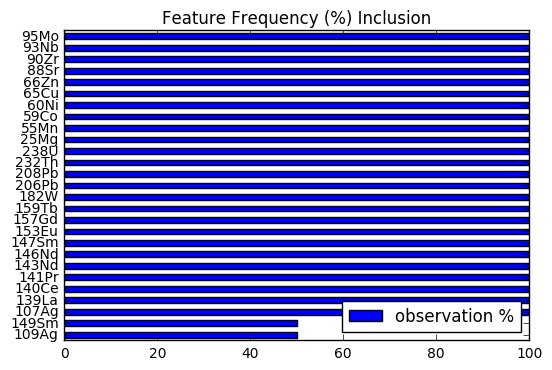

In [70]:
import numpy as np
# plot grid scores
# result.grid_scores_.plot(kind="box", ylim=[0.95, 1])

# plt.show()

# print (result.feature_importances_)

# feature frequency plot
optimum_count = pd.DataFrame(result.feature_importances_.count(axis=1), columns= ['optimal_length'])
print (optimum_count)

# rename the column for convenience
result.name_list_.columns = ["isotope"]


# isolate uniques
unique_featur_list = result.name_list_['isotope'].unique()
print (unique_featur_list)

name_count = list(result.name_list_['isotope'].values)

df1 = pd.DataFrame()
df2 = pd.DataFrame()
for feature_id in unique_featur_list:
    df11 = name_count.count(feature_id)
    df1 = df1.append([df11],ignore_index=True)
    
    df22 = [feature_id]
    df2 = df2.append(df22,ignore_index=True)
    
# turn into a percent
df1 = df1 / pd.Series(len(optimum_count)) * pd.Series(100)

# sort and plot
df3 = pd.concat((df2, df1), axis=1)
df3.index = unique_featur_list
df3.columns = ['feature', 'observation %']
df3.sort_values(by=['observation %', 'feature'], ascending=[True, True], inplace=True)
df3.plot(kind='barh', title='Feature Frequency (%) Inclusion')
# plt.savefig(os.path.join(feature_selection_filepath, 'ffi.eps'))
plt.show()








In [133]:
# holdout groups
optimum_count = pd.DataFrame(result.feature_importances_.count(axis=1), columns= ['optimal_length'])
# print (optimum_count)

result_copy = result.class_scores_f1_.copy(deep=True)
result_copy.drop('optimal_length',axis=1,inplace=True)
# rename the column for convenience
result_copy.columns = ['holdout_f1_scores']
holdout = result_copy.copy(deep=True)
print(result_copy)

holdout_groups = result_copy
holdout_groups['optimal_length'] = optimum_count
print (holdout_groups)

# calculate Q1, median, Q3, and variance
holdout_groups = holdout_groups.groupby(by=['optimal_length'])

holdout_group_names = list(holdout_groups.groups)
print (holdout_group_names)
holdout_group_score_track = pd.DataFrame()
for group_ in holdout_group_names:
    holdout_group_score = pd.DataFrame()
    holdout_group_score_ = np.array(holdout_groups.get_group(group_)['holdout_f1_scores'])
    holdout_group_score['group'] = [group_]
    holdout_group_score['quartile_1'] = [np.percentile(holdout_group_score_,25)]
    holdout_group_score['median'] = [np.percentile(holdout_group_score_, 50)]
    holdout_group_score['quartile_3'] = [np.percentile(holdout_group_score_, 75)]
    holdout_group_score['inner_quartile_range'] = [float(holdout_group_score['quartile_3']-\
                                                  holdout_group_score['quartile_1'])]
    holdout_group_score['number_observed_in_group'] = [len(holdout_groups.groups.get(group_))]
    if holdout_group_score['inner_quartile_range'].all()>0:
        holdout_group_score['optimality_score'] = [float((1/holdout_group_score['group'])*(1/holdout_group_score['median'])*(1/holdout_group_score['inner_quartile_range'])*(holdout_group_score['number_observed_in_group']))]

    holdout_group_score_track = holdout_group_score_track.append(holdout_group_score)

print (holdout_group_score_track)



   holdout_f1_scores
0           0.992329
0           0.989770
   holdout_f1_scores  optimal_length
0           0.992329              25
0           0.989770              27
[25, 27]
   group  quartile_1    median  quartile_3  inner_quartile_range  \
0     25    0.992329  0.992329    0.992329                   0.0   
0     27    0.989770  0.989770    0.989770                   0.0   

   number_observed_in_group  
0                         1  
0                         1  


In [ ]:
# based on the result, the top 5 isotopes were chosen
critical_isotopes = ['140Ce','139La','208Pb','88Sr','90Zr']
filtered_and_threshed_training_data = nat_v_tech.filter_noncritical_isotopes(training_df = training_df,
                                                                            critical_isotopes=critical_isotopes)
# check to make sure we're getting what we need
print (filtered_and_threshed_training_data.head())

In [15]:
# provide initial GBC params to start the training process 
# initialize gbc parameters to determine max estimators with least overfitting
GBC_INIT_PARAMS = {'loss': 'deviance', 'learning_rate': 0.1,
				   'min_samples_leaf': 100, 'n_estimators': 1000,
				   'max_depth': 5, 'random_state': None, 'max_features': 'sqrt'}

# find optimum boosting stages
optimum_boosting_stages = nat_v_tech.find_min_boosting_stages(gbc_base_params=GBC_INIT_PARAMS,
															  training_df=training_df,
															  target_df=target_df)[1]
# print optimum boosting stages
print (optimum_boosting_stages)

417


In [16]:
# now that you've found the optimum boosting stages, find the optimal parameters for training. 
# set optimum boosting stages. Note: n_estimators automatically set
GBC_GRID_SEARCH_PARAMS = {'loss': ['exponential', 'deviance'],
						  'learning_rate': [0.01, 0.1],
						  'min_samples_leaf': [50, 100],
						  'random_state': [None],
						  'max_features': ['sqrt', 'log2'],
						  'max_depth': [5],
						  'n_estimators': [optimum_boosting_stages]}

# find the optimum gbc parameters
gbc_fitted = nat_v_tech.find_optimum_gbc_parameters(crossfolds=5,
													training_df=training_df,
													target_df=target_df,
													gbc_search_params=GBC_GRID_SEARCH_PARAMS)
print (gbc_fitted)

In [18]:
# use the X and y data to train the model. Then test the trained model against the test data and output results.
nat_v_tech.apply_trained_classification(test_data_path=IMPORT_TESTING_DATABASE_PATH,
										output_summary_data_path=OUTPUT_DATA_SUMMARY_PATH,
										output_summary_base_name='summary.csv',
										track_class_probabilities=[0.1, 0.1],
										isotope_trigger='140Ce',
										gbc_fitted=gbc_fitted,
										training_df=training_df,
										target_df=target_df)



(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 1

,run_name,total_particle_count,nat_particle_count,tec_particle_count,nat_above_proba_thresh,tech_above_proba_thresh
0,05_SPK2_naturalTest0_0.04CeO2.csv,546.0,541.0,5.0,0,1
0,06_SPK3_naturalTest0_0.4CeO2.csv,557.0,551.0,6.0,2,1
0,07_SPK4_naturalTest0_4CeO2.csv,765.0,740.0,25.0,8,3
0,08_SPK5_naturalTest0_40CeO2.csv,947.0,691.0,256.0,5,9
0,09_SPK6_naturalTest0_400CeO2.csv,2898.0,1116.0,1782.0,58,58
0,10_LT1_naturalSampleCeO2.csv,382.0,380.0,2.0,2,0
0,11_PS2_naturalSampleCeO2.csv,832.0,826.0,6.0,2,1
0,12_PS2_naturalSampleCeO2.csv,683.0,680.0,3.0,1,0
